# Read the data

Dataset: https://archive.ics.uci.edu/ml/datasets/Poker+Hand

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 10)

# read the data in and add column names
data_train = pd.read_csv("poker.txt", header=None,
                        names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5', 'CLASS'])


In [2]:
data_train

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1


In [3]:
cluster=data_train[['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5']] # get train data
cluster

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,10,1,11,1,13,1,12,1,1
1,2,11,2,13,2,10,2,12,2,1
2,3,12,3,11,3,13,3,10,3,1
3,4,10,4,11,4,1,4,13,4,12
4,4,1,4,13,4,12,4,11,4,10
...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4
25006,4,1,4,10,3,13,3,4,1,10
25007,2,1,2,10,4,4,4,1,4,13
25008,2,12,4,3,1,10,1,12,4,9


# standarize the data (preprocessing)

In [4]:
from sklearn import preprocessing

# standardize clustering variables to have mean=0 and sd=1 so that card suit and
# rank are on the same scale as to have the variables equally contribute to the analysis
clustervar=cluster.copy() # create a copy -> best practice

clustervar['S1']=preprocessing.scale(clustervar['S1'].astype('float64'))
clustervar['C1']=preprocessing.scale(clustervar['C1'].astype('float64'))
clustervar['S2']=preprocessing.scale(clustervar['S2'].astype('float64'))
clustervar['C2']=preprocessing.scale(clustervar['C2'].astype('float64'))
clustervar['S3']=preprocessing.scale(clustervar['S3'].astype('float64'))
clustervar['C3']=preprocessing.scale(clustervar['C3'].astype('float64'))
clustervar['S4']=preprocessing.scale(clustervar['S4'].astype('float64'))
clustervar['C4']=preprocessing.scale(clustervar['C4'].astype('float64'))
clustervar['S5']=preprocessing.scale(clustervar['S5'].astype('float64'))
clustervar['C5']=preprocessing.scale(clustervar['C5'].astype('float64'))

clus_train = clustervar

In [5]:
clus_train

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,-1.351374,0.801327,-1.335171,1.058113,-1.344673,1.598400,-1.340448,1.349730,-1.338435,-1.593673
1,-0.455687,1.068012,-0.443702,1.589054,-0.454300,0.797310,-0.444380,1.349730,-0.444549,-1.593673
2,0.440001,1.334698,0.447766,1.058113,0.436073,1.598400,0.451689,0.815980,0.449338,-1.593673
3,1.335688,0.801327,1.339234,1.058113,1.326445,-1.605959,1.347757,1.616605,1.343225,1.346321
4,1.335688,-1.598846,1.339234,1.589054,1.326445,1.331370,1.347757,1.082855,1.343225,0.811777
...,...,...,...,...,...,...,...,...,...,...
25005,0.440001,0.534641,-0.443702,-0.269239,1.326445,1.064340,1.347757,1.349730,-0.444549,-0.791857
25006,1.335688,-1.598846,1.339234,0.792643,0.436073,1.598400,0.451689,-0.785270,-1.338435,0.811777
25007,-0.455687,-1.598846,-0.443702,0.792643,1.326445,-0.804869,1.347757,-1.585895,1.343225,1.613593
25008,-0.455687,1.334698,1.339234,-1.065650,-1.344673,0.797310,-1.340448,1.349730,1.343225,0.544504


# K-means

In [6]:
from scipy.spatial.distance import cdist

In [7]:
from sklearn.cluster import KMeans

In [8]:
model = KMeans(n_clusters=3, init='random', random_state=22) # init = how to select the first cent, Lernverfahren
    
model.fit(clus_train) # learn on training data 
    
clusassign = model.predict(clus_train) # get cluster assignment
    
print(clusassign[:30]) # cluster of first 30 rows
# print(data_train[:30])
model.labels_[:100]

[1 1 2 2 2 1 1 1 2 2 0 0 1 0 2 1 1 2 2 0 1 1 0 0 1 0 2 0 2 1]


array([1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1,
       0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 1, 1, 0, 2,
       2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 1, 0, 0,
       0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 2, 2, 2, 1, 0, 0, 0])

In [9]:
len(clusassign)

25010

### evaluation

In [10]:
from sklearn import metrics

score = metrics.silhouette_score(clus_train, model.labels_, sample_size=1000)
print(score)

0.06533290815919793


The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

# PCA

In [11]:
from sklearn.decomposition import PCA # PCA from sklearn package

pca_2 = PCA(2) # return 2 first canonical variables > want to reduce to 2 dimensions (in this example from 10)
plot_columns = pca_2.fit_transform(clus_train) # fit PCA to the train dataset
plot_columns

array([[-0.06997417,  0.51918384],
       [ 0.54003729,  0.21911749],
       [-0.04154622,  0.68707748],
       ...,
       [-0.92087343, -0.37945926],
       [ 1.63399698,  2.06562675],
       [ 0.55050864,  0.62420004]])

## plot

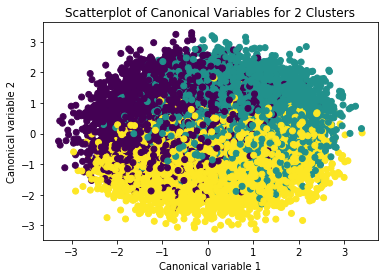

In [14]:
import matplotlib.pylab as plt

plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model.labels_,) # plot 1st canonical variable on x axis, 2nd on y-axis
plt.xlabel('Canonical variable 1') # pc1, canonical = transformed
plt.ylabel('Canonical variable 2') #pc2
plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show() 
# a color per cluster

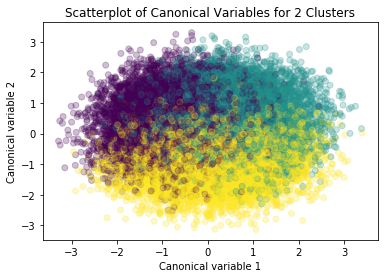

In [13]:
import matplotlib.pylab as plt

plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model.labels_, alpha=0.25) # plot 1st canonical variable on x axis, 2nd on y-axis
plt.xlabel('Canonical variable 1') # pc1, canonical = transformed
plt.ylabel('Canonical variable 2') #pc2
plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show() 
# a color per cluster

# Topic modeling
Assignment is in this area <br>
further info: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [16]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000,
                                   stop_words='english')

In [17]:
# read data
with open('politics.txt','r') as pfh, open('sports.txt','r') as sfh:
    politics = pfh.read()
    sports = sfh.read()
pfh.close()
sfh.close()

In [18]:
politics

'Throughout their joint press conference in London, Trump was effusive in his praise for Theresa May, particularly in relation to her handling of Brexit. It was a marked change in tone from the last time the US President was in the UK, when he had nothing but criticism for the way negotiations were going.\n\nThis time, just as May is about to step down as Prime Minister, Trump praised her efforts to take Britain out of the European Union, saying she had "teed up" a Brexit deal for her successor.\n\n"I think it will happen, and I believe the Prime Minister\'s brought it to a very good point where something will take place in the not-too-distant future, I think she\'s done a very good job," Trump said.\nThe outgoing British Prime Minister joked that Trump, on his last visit, had proposed suing the EU. May said she had chosen to negotiate.\n\n"I would have sued and settled, maybe, but you never know," Trump replied. And in a startling comment for a president who regards himself as a maste

In [19]:
sports

"Rafael Nadal is the player who usually makes history at the French Open given his 11 titles but rival Novak Djokovic got his name into the record books too when he swept past Jan-Lennard Struff 6-3 6-2 6-2.\nSerbian world No. 1 Djokovic -- who awaits Alexander Zverev in the quarterfinals -- became the first man to make 10 straight French Open quarterfinals. Nadal likely would have matched him had he not been forced to pull out in the third round in 2016 with a wrist injury.\nIn another milestone, 17-year-old Amanda Anisimova became the youngest female quarterfinalist at the French Open since Martina Hingis in 1998 after topping Spanish qualifier Aliona Bolsova 6-3 6-0.\nUp next is defending champion Simona Halep, who advanced in similar fashion, 6-1 6-0 in 45 minutes over 18-year-old Wimbledon junior champion Iga Swiatek.\nShowman Monfils has admittedly become more focused towards the latter stages of his career, realizing that at 32 time is indeed running out.\nAnd unusually for him 

In [20]:
data = [politics,sports]
data

['Throughout their joint press conference in London, Trump was effusive in his praise for Theresa May, particularly in relation to her handling of Brexit. It was a marked change in tone from the last time the US President was in the UK, when he had nothing but criticism for the way negotiations were going.\n\nThis time, just as May is about to step down as Prime Minister, Trump praised her efforts to take Britain out of the European Union, saying she had "teed up" a Brexit deal for her successor.\n\n"I think it will happen, and I believe the Prime Minister\'s brought it to a very good point where something will take place in the not-too-distant future, I think she\'s done a very good job," Trump said.\nThe outgoing British Prime Minister joked that Trump, on his last visit, had proposed suing the EU. May said she had chosen to negotiate.\n\n"I would have sued and settled, maybe, but you never know," Trump replied. And in a startling comment for a president who regards himself as a mast

In [25]:
type(data)

list

In [29]:
data[1]

"Rafael Nadal is the player who usually makes history at the French Open given his 11 titles but rival Novak Djokovic got his name into the record books too when he swept past Jan-Lennard Struff 6-3 6-2 6-2.\nSerbian world No. 1 Djokovic -- who awaits Alexander Zverev in the quarterfinals -- became the first man to make 10 straight French Open quarterfinals. Nadal likely would have matched him had he not been forced to pull out in the third round in 2016 with a wrist injury.\nIn another milestone, 17-year-old Amanda Anisimova became the youngest female quarterfinalist at the French Open since Martina Hingis in 1998 after topping Spanish qualifier Aliona Bolsova 6-3 6-0.\nUp next is defending champion Simona Halep, who advanced in similar fashion, 6-1 6-0 in 45 minutes over 18-year-old Wimbledon junior champion Iga Swiatek.\nShowman Monfils has admittedly become more focused towards the latter stages of his career, realizing that at 32 time is indeed running out.\nAnd unusually for him 

In [39]:
# tfidf transformation
tfidf = tfidf_vectorizer.fit_transform(data)
tfidf.data[:50]

array([0.03703577, 0.03703577, 0.03703577, 0.03703577, 0.48146499,
       0.03703577, 0.03703577, 0.03703577, 0.03703577, 0.03703577,
       0.07407154, 0.37035768, 0.03703577, 0.03703577, 0.03703577,
       0.05270251, 0.07407154, 0.1111073 , 0.03703577, 0.03703577,
       0.03703577, 0.07407154, 0.03703577, 0.03703577, 0.1111073 ,
       0.1111073 , 0.03703577, 0.03703577, 0.14814307, 0.03703577,
       0.03703577, 0.03703577, 0.07407154, 0.29628615, 0.03703577,
       0.18517884, 0.07407154, 0.03703577, 0.03703577, 0.07407154,
       0.07407154, 0.03703577, 0.03703577, 0.07407154, 0.03703577,
       0.18517884, 0.03703577, 0.03703577, 0.03703577, 0.03703577])

In [31]:
lda = LatentDirichletAllocation(n_components=10, max_iter=5, # LDA, n_components = number of topics to be found
                                learning_method='online', # 
                                learning_offset=50., 
                                random_state=0) # set seed
                                # doc_topic_prior = alpha = 0.01 per default
                                # topic_word_prior = beta

lda.fit(tfidf)

lda.components_

array([[0.90648441, 0.80038734, 0.91491998, ..., 0.84205074, 0.88681098,
        0.90287758],
       [0.82461464, 0.79816881, 0.74577777, ..., 0.76200763, 0.73024557,
        0.66147714],
       [0.63807905, 0.72167575, 0.83757901, ..., 0.89909526, 0.87436856,
        0.69260016],
       ...,
       [0.75100005, 0.64845797, 0.70339318, ..., 0.87842012, 0.72527646,
        0.69760321],
       [0.59610756, 0.8050048 , 0.7527403 , ..., 0.72310366, 0.75526838,
        0.68936907],
       [0.79668872, 0.69405163, 0.6859384 , ..., 0.73471374, 0.84940294,
        0.74396372]])

every value above is connected to a word below (e. g. 0.9064... to '10')

In [32]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print(tfidf_feature_names[:20])

['10', '11', '17', '18', '1998', '2016', '32', '35', '45', 'absolutely', 'added', 'admittedly', 'advanced', 'ago', 'agreement', 'alexander', 'aliona', 'amanda', 'american', 'anisimova']


## print out top 10 words

In [33]:
import numpy as np
x =[3,5,7,1,0,9,20,5,13,6]
a = np.argsort(x) # for getting the top words later on
print(a)  # returns index with lowest number first, e. g. index 4 contains number 0

[4 3 0 1 7 9 2 5 8 6]


In [34]:
print(a[:-3])

[4 3 0 1 7 9 2]


In [35]:
print(a[:-3 : -1]) # last two values, first two descending values

[6 8]


In [36]:
for topic_idx, topic in enumerate(lda.components_):
    top_words = [tfidf_feature_names[i] for i in topic.argsort()[:-10-1:-1]] # -10 = last 10 values & 
    print('Topic:',topic_idx,'--',top_words) # -1 because python starts at 0

Topic: 0 -- ['rafael', 'monfils', 'agreement', 'lot', '17', 'history', 'female', 'profit', '10', 'wrist']
Topic: 1 -- ['come', 'regards', 'plenty', 'believe', 'universally', 'wimbledon', 'defending', 'titles', 'said', 'certain']
Topic: 2 -- ['clash', 'wimbledon', 'anticipated', 'year', 'think', 'running', 'criticism', 'history', 'regards', 'youngest']
Topic: 3 -- ['milestone', 'rival', 'french', 'course', 'warned', 'swiatek', 'joint', 'particularly', 'post', 'know']
Topic: 4 -- ['step', 'anti', '18', 'nadal', 'position', 'britain', 'thiem', 'wrist', 'course', 'place']
Topic: 5 -- ['amanda', 'man', 'predicted', 'regards', 'startling', 'similar', 'conference', 'career', 'jan', 'relation']
Topic: 6 -- ['trump', 'brexit', 'warned', 'brought', '35', 'unusually', 'defending', 'injury', 'rival', 'history']
Topic: 7 -- ['distant', 'claim', 'milestone', 'joint', 'djokovic', 'anisimova', 'junior', 'champion', 'prime', 'stages']
Topic: 8 -- ['nodded', 'absolutely', 'makes', '18', 'prediction', 'd

## evaluate based on perplexity (Ratlosigkeit, Verwirrung)

In [37]:
pscores = []
for n_topic in [5,10,15,20,30]:
    lda = LatentDirichletAllocation(n_components=n_topic, max_iter=5,random_state=7)

    lda.fit(tfidf)

    perplexity_score = lda.perplexity(tfidf)
    print(perplexity_score)
    pscores.append(perplexity_score)

# pscores
# perplexity score of 0 is best value

5461.5849638366535
73589.98843997678
639994.774734541
4078442.510076312
87139945.35779314


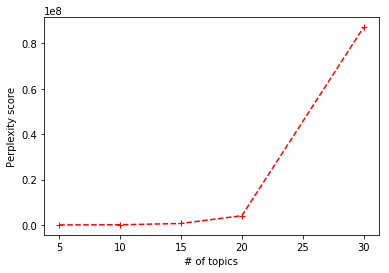

In [38]:
## plot the perplexity score with n_topics
plt.plot([5,10,15,20,30],pscores,'r+--')
plt.xlabel('# of topics')
plt.ylabel('Perplexity score')
plt.show()

Hint: le245 = 10^245

**Intepretation: up to 20 topics are reasonable, but no more!**

Practical tipps:
- use this for less than 10'000 documents: https://pypi.org/project/lda/
- use if there are over 10'000 document: https://radimrehurek.com/gensim/models/ldamodel.html